In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from fbprophet import Prophet
from sklearn.linear_model import LinearRegression


# Load the datasets
pizza_sales = pd.read_excel(r'C:\Users\NAGARAJAN K\Downloads\Pizza_Sale.xlsx')
pizza_ingredients = pd.read_excel(r"C:\Users\NAGARAJAN K\Downloads\Pizza_ingredients.xlsx")

# Display the first few rows to understand the structure of the data
print(pizza_sales.head())
print(pizza_ingredients.head())


   pizza_id  order_id  pizza_name_id  quantity           order_date  \
0         1         1     hawaiian_m         1  2015-01-01 00:00:00   
1         2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2         3         2  five_cheese_l         1  2015-01-01 00:00:00   
3         4         2    ital_supr_l         1  2015-01-01 00:00:00   
4         5         2     mexicana_m         1  2015-01-01 00:00:00   

  order_time  unit_price  total_price pizza_size pizza_category  \
0   11:38:36       13.25        13.25          M        Classic   
1   11:57:40       16.00        16.00          M        Classic   
2   11:57:40       18.50        18.50          L         Veggie   
3   11:57:40       20.75        20.75          L        Supreme   
4   11:57:40       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2 

In [5]:
pizza_sales.isnull().sum()
#pizza_ingredients.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

# Data cleaning

In [9]:

# Create DataFrame
df = pd.DataFrame(pizza_sales)

# Function to fill missing values in column 'C'
for index, row in df[df['pizza_name_id'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']].values
    # Find matching rows
    matching_row = df[(df[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']] == values_to_match).all(axis=1) & df['pizza_name_id'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df.at[index, 'pizza_name_id'] = matching_row['pizza_name_id'].iloc[0]

# Output the updated DataFrame
print(df)


       pizza_id  order_id  pizza_name_id  quantity           order_date  \
0             1         1     hawaiian_m         1  2015-01-01 00:00:00   
1             2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2             3         2  five_cheese_l         1  2015-01-01 00:00:00   
3             4         2    ital_supr_l         1  2015-01-01 00:00:00   
4             5         2     mexicana_m         1  2015-01-01 00:00:00   
...         ...       ...            ...       ...                  ...   
48615     48616     21348  ckn_alfredo_m         1           31-12-2015   
48616     48617     21348  four_cheese_l         1           31-12-2015   
48617     48618     21348   napolitana_s         1           31-12-2015   
48618     48619     21349     mexicana_l         1           31-12-2015   
48619     48620     21350      bbq_ckn_s         1           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36       13.25

In [11]:
pizza_sales_1=df

In [12]:
pizza_sales_1.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [13]:

# Create DataFrame
df1 = pd.DataFrame(pizza_sales_1)

# Function to fill missing values in column 'C'
for index, row in df1[df1['pizza_name'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name_id']].values
    # Find matching rows
    matching_row = df1[(df1[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name_id']] == values_to_match).all(axis=1) & df1['pizza_name'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df1.at[index, 'pizza_name'] = matching_row['pizza_name'].iloc[0]

# Output the updated DataFrame
print(df1)

       pizza_id  order_id  pizza_name_id  quantity           order_date  \
0             1         1     hawaiian_m         1  2015-01-01 00:00:00   
1             2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2             3         2  five_cheese_l         1  2015-01-01 00:00:00   
3             4         2    ital_supr_l         1  2015-01-01 00:00:00   
4             5         2     mexicana_m         1  2015-01-01 00:00:00   
...         ...       ...            ...       ...                  ...   
48615     48616     21348  ckn_alfredo_m         1           31-12-2015   
48616     48617     21348  four_cheese_l         1           31-12-2015   
48617     48618     21348   napolitana_s         1           31-12-2015   
48618     48619     21349     mexicana_l         1           31-12-2015   
48619     48620     21350      bbq_ckn_s         1           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36       13.25

In [15]:
pizza_sales_2=df1
pizza_sales_2.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            0
dtype: int64

In [16]:
# Create DataFrame
df2 = pd.DataFrame(pizza_sales_2)

# Function to fill missing values in column 'C'
for index, row in df2[df2['pizza_ingredients'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_category', 'pizza_name', 'pizza_name_id']].values
    # Find matching rows
    matching_row = df2[(df2[['pizza_size', 'pizza_category', 'pizza_name', 'pizza_name_id']] == values_to_match).all(axis=1) & df2['pizza_ingredients'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df2.at[index, 'pizza_ingredients'] = matching_row['pizza_ingredients'].iloc[0]

# Create DataFrame
df3 = pd.DataFrame(df2)

# Function to fill missing values in column 'C'
for index, row in df3[df3['pizza_category'].isna()].iterrows():
    # Get the values for columns I, J, K, L
    values_to_match = row[['pizza_size', 'pizza_ingredients', 'pizza_name', 'pizza_name_id']].values
    # Find matching rows
    matching_row = df3[(df3[['pizza_size', 'pizza_ingredients', 'pizza_name', 'pizza_name_id']] == values_to_match).all(axis=1) & df3['pizza_category'].notna()]
    if not matching_row.empty:
        # Get the first matching value from column 'C'
        df3.at[index, 'pizza_category'] = matching_row['pizza_category'].iloc[0]

# Output the updated DataFrame
print(df3)
df3.isnull().sum()

       pizza_id  order_id  pizza_name_id  quantity           order_date  \
0             1         1     hawaiian_m         1  2015-01-01 00:00:00   
1             2         2  classic_dlx_m         1  2015-01-01 00:00:00   
2             3         2  five_cheese_l         1  2015-01-01 00:00:00   
3             4         2    ital_supr_l         1  2015-01-01 00:00:00   
4             5         2     mexicana_m         1  2015-01-01 00:00:00   
...         ...       ...            ...       ...                  ...   
48615     48616     21348  ckn_alfredo_m         1           31-12-2015   
48616     48617     21348  four_cheese_l         1           31-12-2015   
48617     48618     21348   napolitana_s         1           31-12-2015   
48618     48619     21349     mexicana_l         1           31-12-2015   
48619     48620     21350      bbq_ckn_s         1           31-12-2015   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36       13.25

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          7
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [17]:
df3['total_price']=df3['total_price'].fillna(df3['unit_price'])
df3.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [19]:
pizza_sales_cleaned=df3
pizza_sales_cleaned.to_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_sales_cleaned.xlsx",index=False)
print("done")

done


In [20]:
pizza_ingredients.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [23]:

df4 = pd.DataFrame(pizza_ingredients)

# Function to fill missing values in column D based on the rule
def fill_column_d(row, df4):
    # Check if current row's column C is "sliced ham" and column D is null
    if row['pizza_ingredients'] == 'Sliced Ham' and pd.isnull(row['Items_Qty_In_Grams']):
        # Find the corresponding "Mozzarella Cheese" row where A and B match
        mozzarella_row = df4[(df4['pizza_ingredients'] == 'Mozzarella Cheese') & 
                            (df4['pizza_name_id'] == row['pizza_name_id']) & 
                            (df4['pizza_name'] == row['pizza_name'])]
        
        # If a matching row is found
        if not mozzarella_row.empty:
            # Get the value from column D of the Mozzarella Cheese row
            mozzarella_d_value = mozzarella_row['Items_Qty_In_Grams'].values[0]
            
            # Set the value of D for "sliced ham" as 1.5 times the Mozzarella Cheese D value
            return mozzarella_d_value * 1.5
    
    # If no matching row is found, return the original value of D (or you can set it to some default)
    return row['Items_Qty_In_Grams']

# Apply the function to fill missing values in column D
df4['Items_Qty_In_Grams'] = df4.apply(lambda row: fill_column_d(row, df4), axis=1)




# Function to fill missing value in column D by averaging column D for matching A and B
def fill_column_d_for_caramelized_onions(row, df4):
    if row['pizza_ingredients'] == 'Caramelized Onions' and pd.isnull(row['Items_Qty_In_Grams']):
        # Find rows where A and B match the current row
        matching_rows = df4[(df4['pizza_name_id'] == row['pizza_name_id']) & (df4['pizza_name'] == row['pizza_name']) & (df4['pizza_ingredients'] != 'Caramelized Onions')]
        
        # Calculate the average of the matching rows in column D
        if not matching_rows.empty:
            avg_d = matching_rows['Items_Qty_In_Grams'].mean()
            return avg_d
    
    # Return the original value if it's not the Caramelized Onions row or it doesn't need filling
    return row['Items_Qty_In_Grams']

# Apply the function to fill missing values in column D
df4['Items_Qty_In_Grams'] = df4.apply(lambda row: fill_column_d_for_caramelized_onions(row, df4), axis=1)

# Display the updated DataFrame


# Display the updated DataFrame
print(df4.isnull().sum())
pizza_ingredients_cleaned=df4
pizza_ingredients_cleaned.to_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_ingredients_cleaned.xlsx",index=False)

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64


In [33]:
pizza_sales_cleaned['pizza_name_id'].nunique()

91

# Feature engineering

In [34]:
# Load the dataset
pizza_sales_featured = pd.read_excel(r"C:\Users\NAGARAJAN K\Desktop\pizza projetc\pizza_sales_cleaned.xlsx")
# Create DataFrame
pizza_sales_featured1 = pd.DataFrame(pizza_sales_featured)

# Convert order_date to datetime format
pizza_sales_featured1['order_date'] = pd.to_datetime(pizza_sales_featured1['order_date'])

# Aggregate the data by 'order_date' to get total quantity sold per day
daily_sales = pizza_sales_featured1.groupby(pizza_sales_featured1['order_date'].dt.date)['quantity'].sum().reset_index()
daily_sales.rename(columns={'order_date': 'date', 'quantity': 'total_sales'}, inplace=True)

# Show aggregated data
print(daily_sales.head())


         date  total_sales
0  2015-01-01          162
1  2015-01-02          191
2  2015-01-03           99
3  2015-01-04          135
4  2015-01-05          154


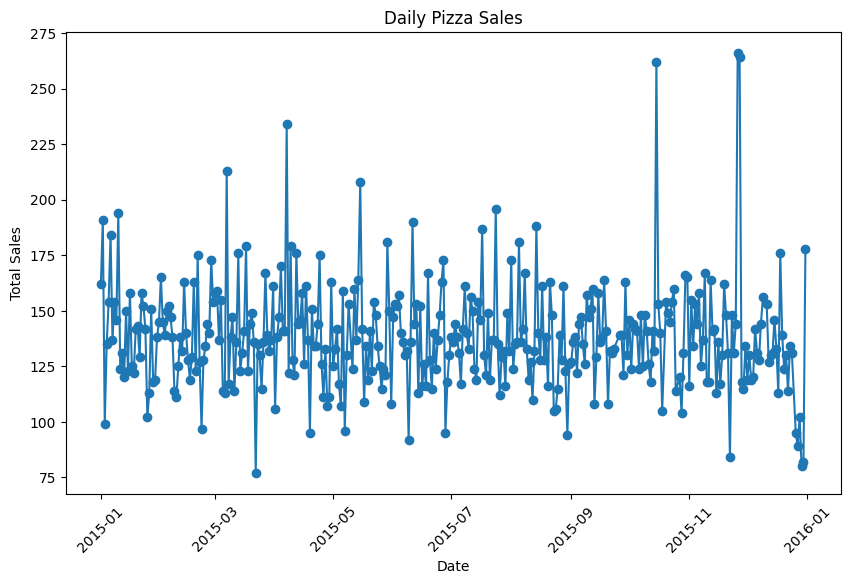

In [35]:
import matplotlib.pyplot as plt

# Plot daily sales data
plt.figure(figsize=(10,6))
plt.plot(daily_sales['date'], daily_sales['total_sales'], marker='o')
plt.title('Daily Pizza Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\NAGARAJAN K\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: N

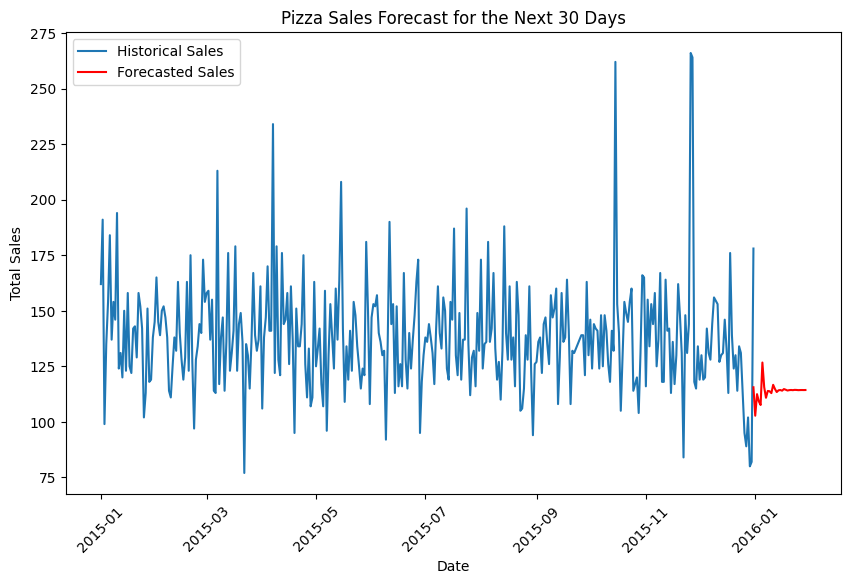

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Set 'date' as the index
daily_sales.set_index('date', inplace=True)

# Fit an ARIMA model
model = ARIMA(daily_sales['total_sales'], order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()

# Make predictions
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales['total_sales'], label='Historical Sales')
plt.plot(pd.date_range(daily_sales.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecasted Sales', color='red')
plt.title('Pizza Sales Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# You can split data into train and test sets and compare actual vs forecasted values.
# For simplicity, assuming 'forecast' is predicted future sales.
y_true = daily_sales['total_sales'].tail(forecast_steps)  # True sales data (test set)
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mean_squared_error(y_true, forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 22.14767056871806
Root Mean Squared Error (RMSE): 26.473807065388378


In [54]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Assuming daily_sales has columns 'date' and 'total_sales'
# Make sure 'date' is the index
daily_sales.set_index('date', inplace=True)

# Fit the ARIMA model
model = auto_arima(daily_sales['total_sales'], seasonal=True, m=7)  # m=7 for weekly seasonality
model.summary()

# Forecasting the next 30 periods
forecast = model.predict(n_periods=30)

# Plot the forecast
plt.plot(daily_sales.index, daily_sales['total_sales'], label='Actual')
plt.plot(pd.date_range(daily_sales.index[-1], periods=31, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Pizza Sales Forecast using ARIMA')
plt.show()



KeyError: 'total_sales'

# Exploratory Data Analysis (EDA)

#Basic Statistics and Visualization

In [57]:
import seaborn as sns
sns.reset_defaults()


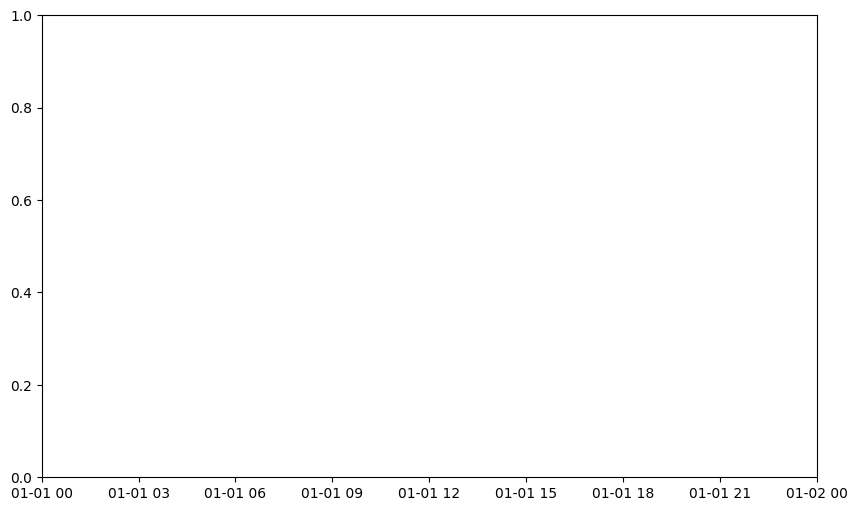

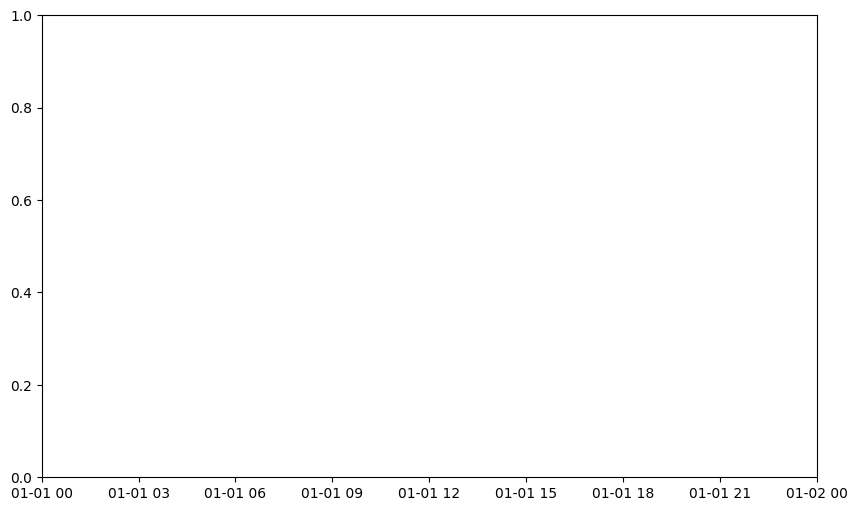

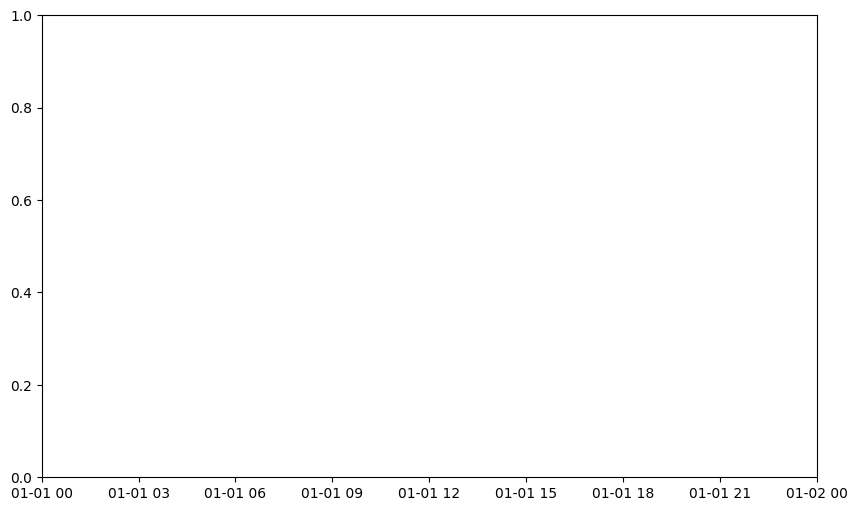

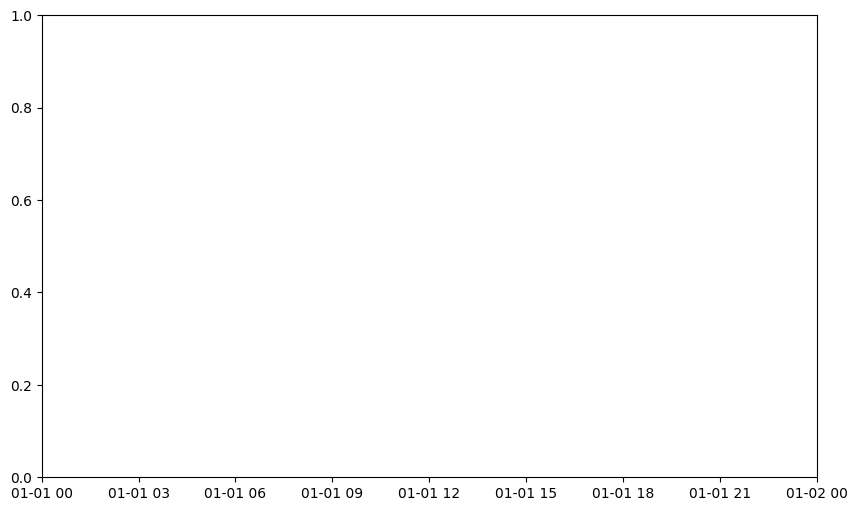

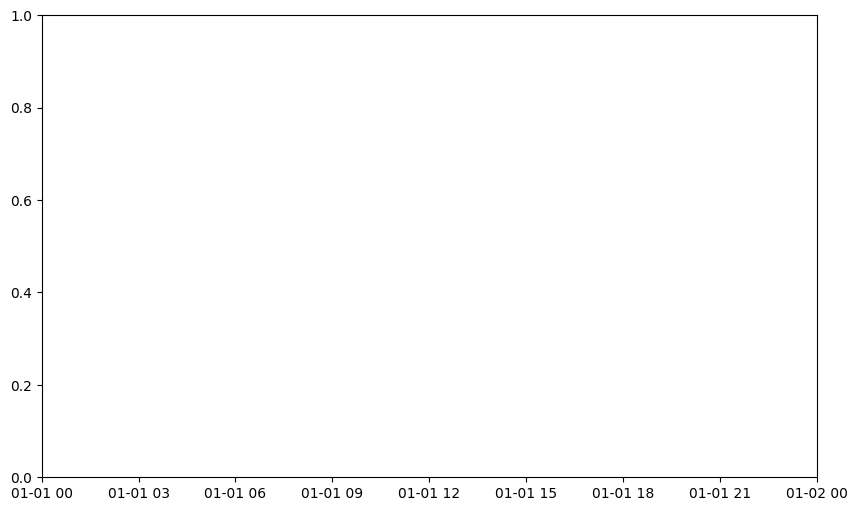

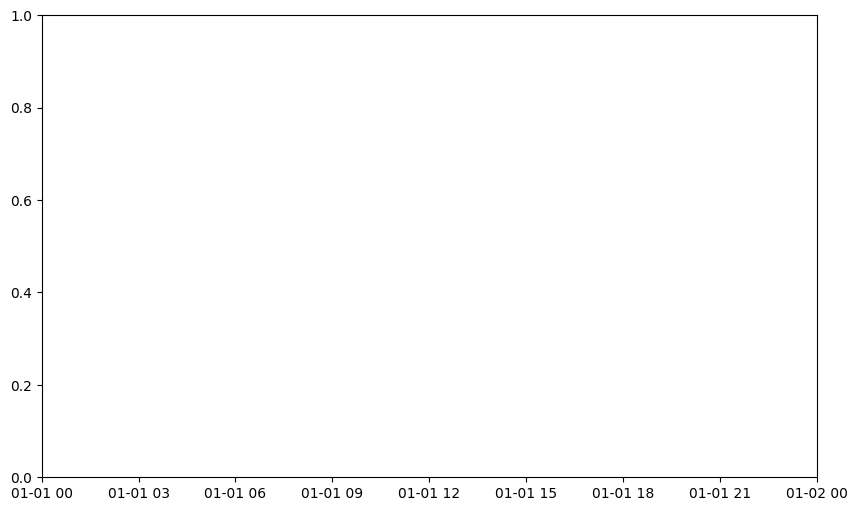

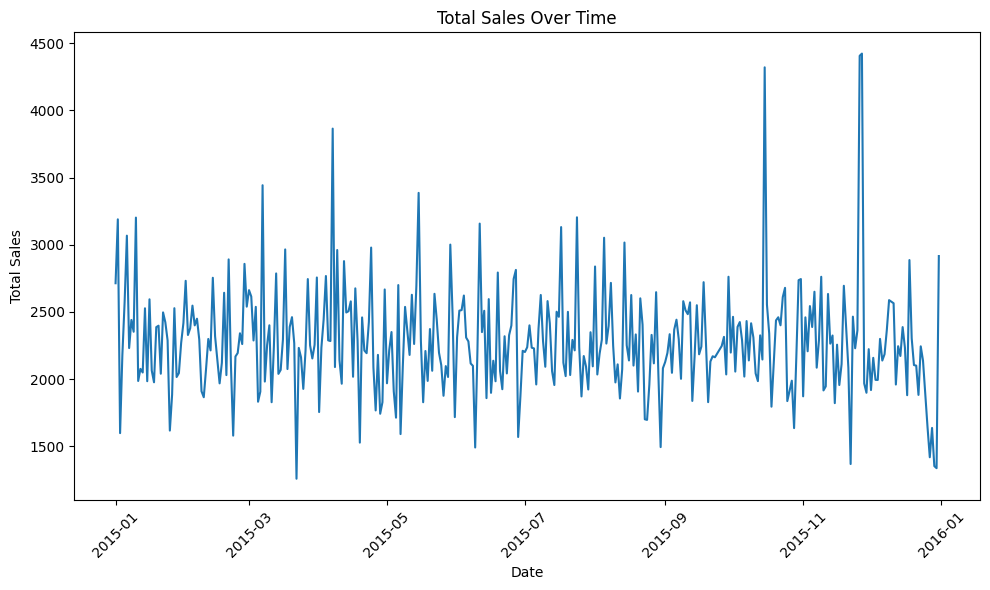

In [64]:
import matplotlib.pyplot as plt

# Plot sales over time using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(sales_daily['order_date'], sales_daily['total_sales'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Avoid clipping of labels
plt.show()


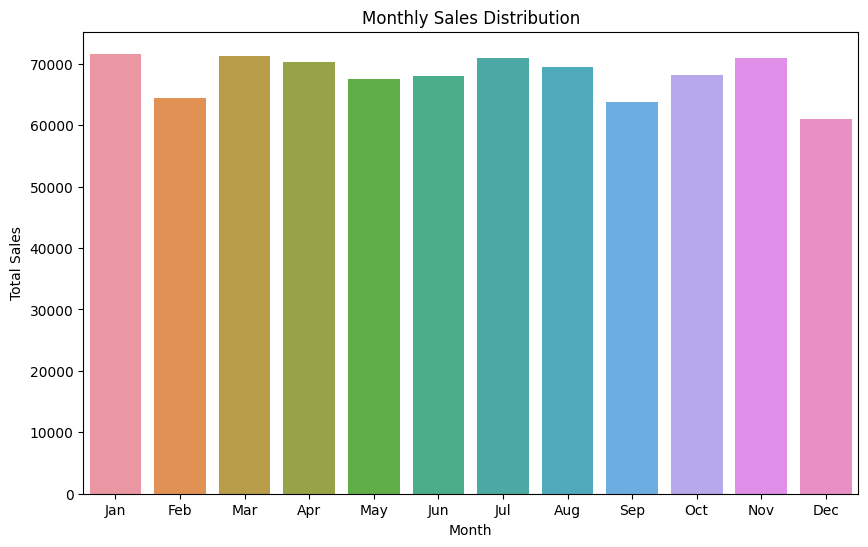

In [66]:
# Ensure 'order_date' is in datetime format
sales_daily['order_date'] = pd.to_datetime(sales_daily['order_date'])

# Create a new 'month' column by extracting the month from 'order_date'
sales_daily['month'] = sales_daily['order_date'].dt.month

# Check monthly trends
monthly_sales = sales_daily.groupby('month').agg(total_sales=('total_sales', 'sum')).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales, x='month', y='total_sales')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


# Sales prediction